In [11]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import linear_model

In [12]:
#using the most up to date pricing of Ethereum's ether, I will predict the linear regression line
#based on data from the most recent week, month, and year.
df = pd.read_csv("eth.csv")
df = df[8:]
df

,date,txVolume(USD),adjustedTxVolume(USD),txCount,marketcap(USD),price(USD),exchangeVolume(USD),generatedCoins,fees,activeAddresses,medianTxValue(USD),medianFee,averageDifficulty,paymentCount,blockSize,blockCount
8,2015-08-07,5.684487e+06,5.684487e+06,2050.0,1.702194e+08,2.830000,1.643290e+05,27437.65625,37.318414,1086.0,41.611713,0.001321,1.470839e+12,1977.0,3282693,5189
9,2015-08-08,3.789968e+07,3.789968e+07,2881.0,1.684644e+08,2.790000,6.741880e+05,27943.43750,68.099970,826.0,0.279000,0.001243,1.586124e+12,1973.0,3508878,5256
10,2015-08-09,8.236055e+05,8.236055e+05,1329.0,4.265564e+07,0.706136,5.321700e+05,27178.28125,14.098950,732.0,7.061360,0.001223,1.709480e+12,1213.0,3167541,5123
11,2015-08-10,1.194050e+06,1.194050e+06,2037.0,4.315326e+07,0.713989,4.052830e+05,27817.34375,31.165144,1001.0,0.359784,0.001228,1.837696e+12,1451.0,3316883,5255
12,2015-08-11,1.053130e+06,1.053130e+06,4963.0,4.272960e+07,0.708087,1.463100e+06,28027.81250,11.311449,2342.0,0.034006,0.001218,2.036391e+12,3029.0,3653834,5280
13,2015-08-12,7.974742e+05,7.974742e+05,2036.0,6.398665e+07,1.060000,2.150620e+06,27370.93750,32.586992,906.0,7.634962,0.001244,2.207080e+12,1479.0,3348157,5124
14,2015-08-13,2.182920e+06,2.182920e+06,2842.0,7.373813e+07,1.220000,4.068680e+06,28268.12500,24.929169,1274.0,9.947564,0.001210,2.336980e+12,2486.0,3519008,5286
15,2015-08-14,4.162002e+06,4.162002e+06,3174.0,1.094628e+08,1.810000,4.637030e+06,31106.71875,14.354834,1594.0,18.750143,0.001210,2.671253e+12,3014.0,3832496,5809
16,2015-08-15,1.390241e+07,1.390241e+07,2284.0,1.089624e+08,1.800000,2.554360e+06,28512.65625,8.836593,1313.0,18.000000,0.001210,3.378028e+12,2170.0,3435520,5382
17,2015-08-16,2.898480e+06,2.898480e+06,2440.0,1.015501e+08,1.680000,3.550790e+06,27094.53125,6.677238,1202.0,12.007029,0.001208,3.631632e+12,2340.0,3287835,5132


In [13]:
price = df.loc[:, 'price(USD)']
price

8         2.830000
9         2.790000
10        0.706136
11        0.713989
12        0.708087
13        1.060000
14        1.220000
15        1.810000
16        1.800000
17        1.680000
18        1.580000
19        1.220000
20        1.170000
21        1.250000
22        1.480000
23        1.400000
24        1.380000
25        1.350000
26        1.230000
27        1.130000
28        1.170000
29        1.150000
30        1.190000
31        1.180000
32        1.320000
33        1.350000
34        1.350000
35        1.300000
36        1.260000
37        1.280000
           ...    
1310    136.840000
1311    136.350000
1312    134.790000
1313    132.160000
1314    127.790000
1315    137.960000
1316    138.940000
1317    138.310000
1318    134.890000
1319    138.180000
1320    136.850000
1321    134.010000
1322    134.610000
1323    133.200000
1324    133.570000
1325    137.910000
1326    142.240000
1327    140.100000
1328    139.250000
1329    140.480000
1330    140.480000
1331    136.

In [14]:
daterange = int(input("Enter number of days (1-1332): "))
#x = range(MONTH, len(df))
x = np.linspace(0, daterange, daterange)
slice = price[len(df)-daterange:]

Enter number of days (1-1332): 200


In [15]:
X = x.reshape(len(x), 1)

In [16]:
reg = linear_model.LinearRegression()
reg.fit(X, slice)
Y = reg.predict(X)

Text(0, 0.5, 'Price/Ether (USD)')

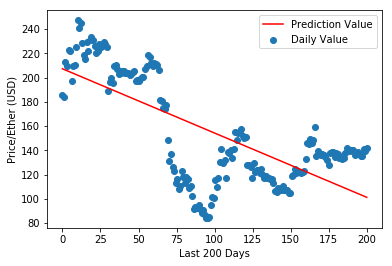

In [17]:
plt.scatter(x, slice)
plt.plot(x, Y, 'r')
plt.legend(['Prediction Value', 'Daily Value'])

plt.xlabel('Last {} Days'.format(daterange))
plt.ylabel("Price/Ether (USD)")

In [18]:
pred = int(input(f'Enter day to predict 0-{daterange}: '))
val = int(reg.predict([[pred]]))
print(val, 'USD/Ether')

Enter day to predict 0-200: 20
196 USD/Ether


In [19]:
#from sklearn.preprocessing import PolynomialFeatures
#poly = PolynomialFeatures(degree=4, include_bias=False)
#from sklearn import preprocessing
#x_scaled = preprocessing.scale(x)
#x_new = poly.fit_transform([x_scaled])
#x_new
#x_n = np.hstack([x, x**2, x**3, x**4])